## Import libraries

In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
import pandas as pd
from lib.generate_measure_sql import get_measure_json, build_sql
from change_detection import functions as chg
from lib.regression import rd

In [2]:
## When not using cached data, this needs to be run first time
## after set up of docker environment (to authenticate BigQuery)
#from ebmdatalab import bq
#bq.cached_read("nothing",csv_path="nothing")

# Define measures and build measure SQL

In [3]:
# NBVAL_IGNORE_OUTPUT
#measures = ["desogestrel","trimethoprim"]
run_name = "custom_des_trim"
#get_measure_json(measures, run_name)
#build_sql(run_name)

# Run change detection on all measures

In [4]:
change = chg.ChangeDetection(
    name=run_name,
    measure=True,
    custom_measure=True,
    direction="down",
    use_cache=True,
    overwrite=False,
    verbose=False,
    draw_figures="no")
change.run()

In [5]:
changes = change.concatenate_outputs()
changes.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure     name                                             
desogestrel A81001          2       46.0              46.0   
            A81002          2       42.0              42.0   
            A81003          1       41.0              41.0   
            A81004          3       40.0              40.0   
            A81005          1       40.0              40.0   

                    is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure     name                                                           
desogestrel A81001                   46.0            46.0           46.0   
            A81002                   42.0            42.0           42.0   
            A81003                   41.0            41.0           41.0   
            A81004                   40.0            40.0           40.0   
            A81005                   40.0            40.0           40.0   

                    is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure     name                                                          
desogestrel A81001    -0.081600         -0.090631              0.562657   
            A81002    -0.478759         -2.844392              0.839145   
            A81003    -0.036546         -0.040380              0.520000   
            A81004    -0.096405         -0.110674              0.522166   
            A81005    -0.034794         -0.036432              0.538462   

                    is.intlev.initlev  is.intlev.finallev  is.intlev.levd  \
measure     name                                                            
desogestrel A81001           0.981948            0.401846        0.580102   
            A81002           0.647076            0.076544        0.570532   
            A81003           0.941602            0.064500        0.877102   
            A81004           0.967481            0.044352        0.923130   
            A81005           0.989830            0.085181        0.904649   

                    is.intlev.levdprop  
measure     name                        
desogestrel A81001            0.590767  
            A81002            0.881708  
            A81003            0.931500  
            A81004            0.954158  
            A81005            0.913944

# Determine changes at national level for comparison
- 1st decile of practice level changes

In [6]:
changes_nat = changes.groupby('measure').quantile(0.1)
changes_nat

,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
measure,,,,,,,,,,,,,
desogestrel,0.0,12.0,12.0,12.0,12.0,17.0,-0.594230,-1.325521,0.510742,0.452600,0.009173,0.218653,0.341958
trimethoprim,0.0,10.0,10.0,10.0,10.0,13.0,-0.216865,-0.394956,0.510204,0.560184,0.146684,0.203872,0.317106


# Compare practice level changes with national changes

In [7]:
difference = changes - changes_nat
difference.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure     name                                             
desogestrel A81001        2.0       34.0              34.0   
            A81002        2.0       30.0              30.0   
            A81003        1.0       29.0              29.0   
            A81004        3.0       28.0              28.0   
            A81005        1.0       28.0              28.0   

                    is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure     name                                                           
desogestrel A81001                   34.0            34.0           29.0   
            A81002                   30.0            30.0           25.0   
            A81003                   29.0            29.0           24.0   
            A81004                   28.0            28.0           23.0   
            A81005                   28.0            28.0           23.0   

                    is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure     name                                                          
desogestrel A81001     0.512630          1.234890              0.051916   
            A81002     0.115471         -1.518870              0.328403   
            A81003     0.557684          1.285142              0.009258   
            A81004     0.497825          1.214848              0.011424   
            A81005     0.559436          1.289089              0.027720   

                    is.intlev.initlev  is.intlev.finallev  is.intlev.levd  \
measure     name                                                            
desogestrel A81001           0.529348            0.392673        0.361449   
            A81002           0.194475            0.067371        0.351879   
            A81003           0.489002            0.055327        0.658449   
            A81004           0.514881            0.035179        0.704477   
            A81005           0.537230            0.076008        0.685996   

                    is.intlev.levdprop  
measure     name                        
desogestrel A81001            0.248809  
            A81002            0.539750  
            A81003            0.589542  
            A81004            0.612200  
            A81005            0.571986

# Get other regression variables

In [8]:
reg_data = rd.get_data()
reg_data.head()

,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),% who have a positive experience of their GP practice,...,pct,total_items,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11
code,,,,,,,,,,,,,,,,,,,,,
A81001,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,81.489722,...,00K,94138.0,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town
A81002,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,85.932369,...,00K,451497.0,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town
A81003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00K,NaN,NaN,NaN,NaN,NaN,NaN,Hartlepool 007D,C,Urban city and town
A81004,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,94.128403,...,00M,214788.0,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town
A81005,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,92.121005,...,00M,195485.0,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town


# Merge outcome(s) with regression variables and export to Stata
- Stata code currently run separately
- Future: convert to use R

In [9]:
measures = difference.index.get_level_values(0).unique()
for m in measures:
    reg_data[m] = difference.loc[m,"is.tfirst.big"]

reg_data.to_csv("../lib/regression/data/data_for_stata.csv")
reg_data.head()

,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),% who have a positive experience of their GP practice,...,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11,desogestrel,trimethoprim
code,,,,,,,,,,,,,,,,,,,,,
A81001,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,81.489722,...,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town,29.0,32.0
A81002,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,85.932369,...,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town,25.0,36.0
A81003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hartlepool 007D,C,Urban city and town,24.0,NaN
A81004,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,94.128403,...,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town,23.0,35.0
A81005,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,92.121005,...,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town,23.0,34.0


# Explore outcomes

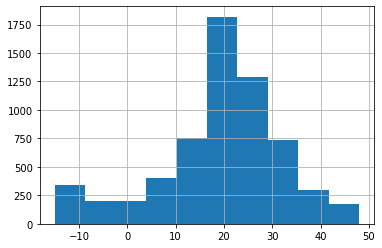

In [10]:
difference.loc["desogestrel","is.tfirst.big"].hist()

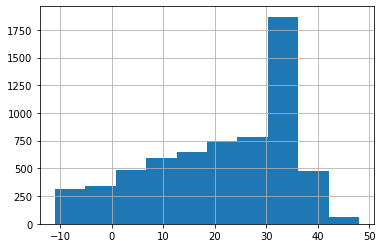

In [11]:
difference.loc["trimethoprim","is.tfirst.big"].hist()